<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Exploring-price-and-odometer_km-columns" data-toc-modified-id="Exploring-price-and-odometer_km-columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring <code>price</code> and <code>odometer_km</code> columns</a></span></li><li><span><a href="#Exploring-Dates" data-toc-modified-id="Exploring-Dates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring Dates</a></span></li><li><span><a href="#Fixing-incorrect-registration-year" data-toc-modified-id="Fixing-incorrect-registration-year-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fixing incorrect registration year</a></span></li><li><span><a href="#Exploring-Price-by-Brand" data-toc-modified-id="Exploring-Price-by-Brand-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploring Price by Brand</a></span></li><li><span><a href="#Most-common-brand/model-combinations" data-toc-modified-id="Most-common-brand/model-combinations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Most common brand/model combinations</a></span></li><li><span><a href="#Relating-Mileage-and-Price" data-toc-modified-id="Relating-Mileage-and-Price-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Relating Mileage and Price</a></span></li><li><span><a href="#Comparing-damage-vs-no-damage" data-toc-modified-id="Comparing-damage-vs-no-damage-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparing damage vs no damage</a></span></li></ul></div>

# Introduction 

This project explores Ebay Car Sales Data. The data is sampled from the full dataset from Kaggle https://www.kaggle.com/orgesleka/used-cars-database/data and dirtied.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
autos = pd.read_csv('autos.csv',encoding = 'latin1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [166]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46681 entries, 0 to 49999
Data columns (total 17 columns):
dateCrawled           46681 non-null object
name                  46681 non-null object
price                 46681 non-null int32
abtest                46681 non-null object
vehicleType           43977 non-null object
registration_year     46681 non-null int64
gearbox               44571 non-null object
powerPS               46681 non-null int64
model                 44488 non-null object
odometer_km           46681 non-null int32
registration_month    46681 non-null int64
fuelType              43363 non-null object
brand                 46681 non-null object
unrepaired_damage     38374 non-null object
ad_created            46681 non-null object
postalCode            46681 non-null int64
lastSeen              46681 non-null object
dtypes: int32(2), int64(4), object(11)
memory usage: 7.3+ MB


* Many of the columns of missing values (no columns > 20% missing) 
* There are 5 integer columns and 15 string columns
* dateCreated looks like it ends with 00:00:00 always
* Car Names are really long and varied
* `price` and `odometer` could be converted to numbers for more analysis
* There are 3 columns of detailed datetimes and 2 columns of dates
* The column names are camelCase

In [5]:
cols = autos.columns

In [6]:
cols

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
#Columns names replaced to improve readability and meaning
autos.columns = (cols
                 .str.replace('yearOfRegistration','registration_year')
                 .str.replace('monthOfRegistration','registration_month')
                 .str.replace('notRepairedDamage','unrepaired_damage')
                 .str.replace('dateCreated','ad_created')
                 .str.replace('nrOfPictures','num_photos')
                )

In [8]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,num_photos,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [9]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,num_photos,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-27 22:55:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


* Columns seller and offerType are almost all of the same value, they should be dropped
* odometer and price are numeric data stored as string
* num_photos has all 0 in descriptive stats, need more investigation

In [10]:
autos.num_photos.value_counts(dropna=False) #num_photos also has all the same values, should drop
autos = autos.drop(['seller','offerType','num_photos'],axis=1)

0    50000
Name: num_photos, dtype: int64

In [11]:
autos['price'] = (autos.price
                        .str.replace('$','')
                        .str.replace(',','')
                        .astype(int) 
                 )
autos['odometer'] = (autos.odometer
                        .str.replace('km','')
                        .str.replace(',','')
                        .astype(int)
                       )

In [12]:
autos = autos.rename({'odometer':'odometer_km'},axis = 1)

# Exploring `price` and `odometer_km` columns 

In [13]:
autos.price.unique().shape    
autos.odometer_km.unique().shape
autos[['price','odometer_km']].describe()

(2357,)

(13,)

,price,odometer_km
count,5.000000e+04,50000.000000
mean,9.840044e+03,125732.700000
std,4.811044e+05,40042.211706
min,0.000000e+00,5000.000000
25%,1.100000e+03,125000.000000
50%,2.950000e+03,150000.000000
75%,7.200000e+03,150000.000000
max,1.000000e+08,150000.000000


In [14]:
autos.price.value_counts().sort_index()

0           1421
1            156
2              3
3              1
5              2
8              1
9              1
10             7
11             2
12             3
13             2
14             1
15             2
17             3
18             1
20             4
25             5
29             1
30             7
35             1
40             6
45             4
47             1
49             4
50            49
55             2
59             1
60             9
65             5
66             1
            ... 
151990         1
155000         1
163500         1
163991         1
169000         1
169999         1
175000         1
180000         1
190000         1
194000         1
197000         1
198000         1
220000         1
250000         1
259000         1
265000         1
295000         1
299000         1
345000         1
350000         1
999990         1
999999         2
1234566        1
1300000        1
3890000        1
10000000       1
11111111       2
12345678      

After 350,000 , the prices suddenly jump by 3 times to 999990, this and prices above look like outliers.

In [15]:
autos = autos[autos.price.between(1,350000)]  #remove 0 prices too since they only occupy 3% of total rows

In [16]:
autos.odometer_km.value_counts().sort_index()  
# neatly rounded options suggest preset options for sellers
# most cars are high mileage

5000        836
10000       253
20000       762
30000       780
40000       815
50000      1012
60000      1155
70000      1217
80000      1415
90000      1734
100000     2115
125000     5057
150000    31414
Name: odometer_km, dtype: int64

# Exploring Dates

__From Crawler:__
* date_crawled
* last_seen

__From Website:__
* ad_created
* registration_month
* registration_year

In [17]:
autos['dateCrawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()


2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: dateCrawled, dtype: float64

Number of listings crawled suddenly dropped by 4-10x on 2016-4-06 and  2016-4-07

In [18]:
autos['lastSeen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()


2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: lastSeen, dtype: float64

* last seen allows us to infer which date the listing is removed.  
* 48% of the last seen pages were on 2016-04-05 to 2016-04-07, may be related to crawling period ending

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

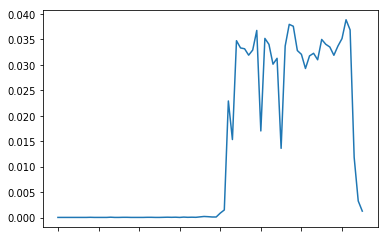

In [19]:
temp = autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()
temp
temp.plot()

The date range of ad_created is much larger, going back to 2015-06-11, much more (500x) ads are created after 2016-03-09 than before 2016-02-21. To refine the cutoff, more detailed filtering of rows is required

In [20]:
mask = pd.Series(temp.index).between('2016-02-21','2016-03-09')
temp[np.array(mask)] #array to avoid IndexingError: Unalignable boolean Series provided as indexer


2016-02-21    0.000062
2016-02-22    0.000021
2016-02-23    0.000082
2016-02-24    0.000041
2016-02-25    0.000062
2016-02-26    0.000041
2016-02-27    0.000124
2016-02-28    0.000206
2016-02-29    0.000165
2016-03-01    0.000103
2016-03-02    0.000103
2016-03-03    0.000865
2016-03-04    0.001483
2016-03-05    0.022897
2016-03-06    0.015320
2016-03-07    0.034737
2016-03-08    0.033316
2016-03-09    0.033151
Name: ad_created, dtype: float64

Now we can see the exact date where ad_created suddenly increased is 2016-03-05. EBay might have had some promotion that day

In [21]:
autos[['ad_created','dateCrawled','lastSeen']] #columns follow expected pattern, dates increase going left to right

,ad_created,dateCrawled,lastSeen
0,2016-03-26 00:00:00,2016-03-26 17:47:46,2016-04-06 06:45:54
1,2016-04-04 00:00:00,2016-04-04 13:38:56,2016-04-06 14:45:08
2,2016-03-26 00:00:00,2016-03-26 18:57:24,2016-04-06 20:15:37
3,2016-03-12 00:00:00,2016-03-12 16:58:10,2016-03-15 03:16:28
4,2016-04-01 00:00:00,2016-04-01 14:38:50,2016-04-01 14:38:50
5,2016-03-21 00:00:00,2016-03-21 13:47:45,2016-04-06 09:45:21
6,2016-03-20 00:00:00,2016-03-20 17:55:21,2016-03-23 02:48:59
7,2016-03-16 00:00:00,2016-03-16 18:55:19,2016-04-07 03:17:32
8,2016-03-22 00:00:00,2016-03-22 16:51:34,2016-03-26 18:18:10
9,2016-03-16 00:00:00,2016-03-16 13:47:02,2016-04-06 10:46:35


# Fixing incorrect registration year 

In [22]:
autos.registration_year.describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

registration_year may help convey age of car. The min year is before cars were invented (~1800) The max year is too far in the future, obviously wrong. Registration must happen before listing, so ad_created sets the latest possible time (2016) of corresponding registration. Any year above 2016 is wrong. For the earliest time, 1900 is a realistic estimate.

In [23]:
autos.registration_year.between(1900,2016).sum()/len(autos) #large portion of values are within this reasonable range, it's safe to remove rows outside rows

0.961206630289303

In [24]:
autos = autos[autos.registration_year.between(1900,2016)]

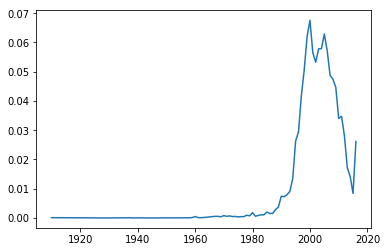

In [25]:
autos.registration_year.value_counts(normalize=True).sort_index().plot()
plt.show()

Most of the cars have registration year around 2000. There are significantly less cars registered before 1980.

# Exploring Price by Brand

In [26]:
autos.brand.value_counts(normalize=True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

There are 40 brands in the dataset. Volkswagen has more than double the number of bmw in rank 2. The top 6 brands by number of listing each have more than 5% of the total number of listings. Together they represent 65% of the listings and are selected to be analyzed. 

In [27]:
top_6 = autos.brand.value_counts(normalize=True).index[:6]
brand_prices = {}
for brand in top_6:
    group = autos[autos.brand == brand]
    brand_prices[brand] = int(group.price.mean())

In [28]:
top_6
for brand in sorted(brand_prices, key=brand_prices.get):
    print(brand, brand_prices[brand])

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

opel 2975
ford 3749
volkswagen 5402
bmw 8332
mercedes_benz 8628
audi 9336


There are 3 distinct price levels (rank denotes listing rank)

* ford(rank 6) + opel(rank 3)
* volkswagen(rank 1)
* audi(rank 5) + mercedes_benz(rank 4) + bmw (rank 2)

opel and ford have significantly lower prices than the other 4 brands in top 6. This could be due to ford and opel being older vehicles and thus having a greater supply in the market. Volkswagen could be rank 1 because it is the best value for money

In [29]:
auto_top_6 = autos[autos.brand.isin(top_6)]
auto_top_6[['brand','registration_year']].groupby('brand').mean()

,registration_year
brand,
audi,2004.155902
bmw,2003.035235
ford,2002.769844
mercedes_benz,2002.031312
opel,2002.223218
volkswagen,2002.467248


Surprisingly all the registration_years are close to each other, so age of car is not a significant predictor of the huge differences in price.

In [30]:
brand_mileage = {}

for brand in top_6:
    group = autos[autos.brand == brand]
    brand_mileage[brand] = int(group.odometer_km.mean())   

In [31]:
brand_summary = pd.DataFrame.from_dict(brand_mileage,orient='index').rename(columns = {0:'mean_mileage'})
price_series = pd.Series(brand_prices)
brand_summary['mean_prices'] = price_series
brand_summary.sort_values('mean_prices')

,mean_mileage,mean_prices
opel,129310,2975
ford,124266,3749
volkswagen,128707,5402
bmw,132572,8332
mercedes_benz,130788,8628
audi,129157,9336


Between brands, car mileages do not vary as much as prices, mileage looks generally unrelated to price. The more expensive brands have a slightly higher mileage There could be other factors affecting price

# Most common brand/model combinations 

In [170]:
group = autos['model'].groupby(autos.brand).value_counts()

max_index = group.groupby(level='brand').apply(lambda x: x.idxmax()[1])
max_value = group.groupby(level='brand').apply(lambda x: x.max())
max_value.name = 'model_count'

pd.concat([max_index,max_value],axis=1)

,model,model_count
brand,,
alfa_romeo,156,88
audi,a4,1231
bmw,3er,2615
chevrolet,andere,147
chrysler,andere,52
citroen,andere,219
dacia,sandero,44
daewoo,matiz,22
daihatsu,cuore,63


# Relating Mileage and Price 

In [ ]:
autos[['odometer_km','price']].corr() #only slight negative correlation generally
odometer_price = autos[['odometer_km','price']].groupby('odometer_km').mean()
odometer_price.price.reset_index().corr()
odometer_price.plot()

# Comparing damage vs no damage 

In [ ]:
autos.unrepaired_damage.value_counts(dropna =False)

In [ ]:
autos_nodamage = autos[autos.unrepaired_damage == 'nein']
autos_damage = autos[autos.unrepaired_damage == 'ja']

autos_nodamage.price.plot(label = 'no damage')
autos_damage.price.plot(label = 'damage')
plt.legend()

Cars without damage sell for more than 5x the price of damaged cars. 

In [ ]:
autos.sample(20)